In [1]:
import math
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np 

## Ønsker å teste ut metoden min på 'dummie-data' sånn at jeg kan sjekke at jeg har riktig metode

In [2]:
level = np.linspace(0,50,6)
depth = 50 
time = np.linspace(0,364,365)
omg = (2*math.pi)/20
omg2 = (2*math.pi)/5
A2 = 1
A1 = 0.3*A2

u2 = np.full((int(len(time)),int(len(level))),np.nan)
u1 = np.full((int(len(time)),int(len(level))),np.nan)
u2.shape

(365, 6)

In [3]:
level

array([ 0., 10., 20., 30., 40., 50.])

In [4]:
'u = det første BC mode --> se joe compendium notater likning 5.38'

'u2 har to bøler, mens u1 har en  '
for t in range(len(time)): 
    for z in range(len(level)): 
        u2[t,z] = A1*math.cos((math.pi/depth)*level[z])*math.cos(-omg*time[t]) + A2*math.cos((2*math.pi/depth)*level[z])*math.cos(-omg2*time[t])
        u1[t,z] = A1*math.cos((math.pi/depth)*level[z])*math.cos(-omg*time[t]) 
        

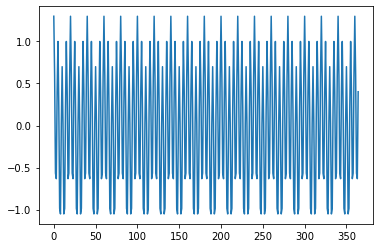

In [5]:
plt.plot(time,u2[:,0])

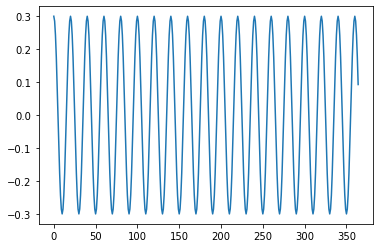

In [6]:
plt.plot(time,u1[:,0])

In [7]:
u2.shape

(365, 6)

In [8]:
'Regner ut cov for begge bølgene'
cov2 = np.cov(u2.T, bias=True) # uten .T ble den en 73x73 matrise 
values2, vectors2 = np.linalg.eig(cov2)

order2 = values2.argsort()[::-1]
values2_, vectors2_ = values2[order2], vectors2[:, order2]


cov1 = np.cov(u1.T, bias=True) # uten .T ble den en 73x73 matrise 
values1, vectors1 = np.linalg.eig(cov1)

order1 = values1.argsort()[::-1]
values1_, vectors1_ = values1[order1], vectors1[:, order1]

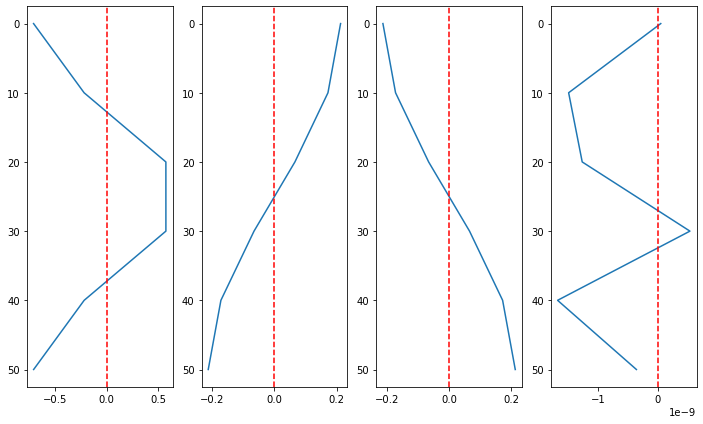

In [9]:
'Plotter begge bølgene: 1,2 er u2, 3,4 er u1'
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (12,7))

ax1.plot(vectors2_[:,0]*np.sqrt(values2_[0]),level)
ax1.axvline(0, color='r', linestyle = '--')
ax1.invert_yaxis()

ax2.plot(vectors2_[:,1]*np.sqrt(values2_[1]),level)
ax2.axvline(0, color='r', linestyle = '--')
ax2.invert_yaxis()

ax3.plot(vectors1_[:,0]*np.sqrt(values1_[0]),level)
ax3.axvline(0, color='r', linestyle = '--')
ax3.invert_yaxis()

ax4.plot(vectors1_[:,1]*np.sqrt(values1_[1]),level)
ax4.axvline(0, color='r', linestyle = '--')
ax4.invert_yaxis()

# Hvordan regne ut covvariance matrix for 2x2 og med np.cov

- viktig å få med hvordan rekkene og kolonnene til en array gjennspeiler seg i håndregninsmatrisen.. 